#  Apache Spark Basics

# Part a) Basic Operations on Resilient Distributed Dataset (RDD) 

In [1]:

sc = SparkContext.getOrCreate()

In [2]:
list1 = ["spark","rdd","python","context","create","class"]
list2 = ["operation","apache","scala","lambda","parallel","partition"]
a = sc.parallelize(list1)
b = sc.parallelize(list2)
a = a.map(lambda x: (x,1))
b = b.map(lambda x: (x,1))

In [3]:
x = a.fullOuterJoin(b).map(lambda x: x[0])
x.collect()


['python',
 'create',
 'context',
 'apache',
 'operation',
 'spark',
 'scala',
 'partition',
 'class',
 'rdd',
 'parallel',
 'lambda']

In [4]:
y = a.rightOuterJoin(b).map(lambda x: x[0])
print(y.collect())

['apache', 'operation', 'scala', 'partition', 'parallel', 'lambda']


In [5]:
string1 = "".join(word for word in list1)
string2 = "".join(word for word in list2)
list3 = list(string1)
list4 = list(string2)
c = sc.parallelize(list3)
d = sc.parallelize(list4)

#map reduce to count occurance of s in a

count_a = c.map(lambda x:'s' in x)
count_a = count_a.reduce(lambda a, b:a+b)
print("total number of occurances of s in a :",count_a)

# map reduce to count ocurrance of s in b
count_b = d.map(lambda x:'s' in x)
count_b = count_b.reduce(lambda a, b:a+b)
print("total number of occurances of s in b :",count_b)
total_count = count_a + count_b
print("total count of s in a and b is:",total_count)

('total number of occurances of s in a :', 3)
('total number of occurances of s in b :', 1)
('total count of s in a and b is:', 4)


In [6]:
aggregate_a = a.flatMap(lambda x: list(x[0]))
aggregate_a = aggregate_a.map(lambda x: (x,1)).filter(lambda x: x[0]=='s')
aggregate_a = aggregate_a.aggregateByKey((0.0),
                (lambda x,y: (x+y)),(lambda m,n:(m+n))).values().collect()

print("The total count of s in list 1 is :",aggregate_a)
aggregate_b = b.flatMap(lambda x: list(x[0]))
aggregate_b = aggregate_b.map(lambda x: (x,1)).filter(lambda x: x[0]=='s')
aggregate_b = aggregate_b.aggregateByKey((0.0),
                (lambda x,y: (x+y)),(lambda m,n:(m+n))).values().collect()
#aggregate_b.values().collect()
print("The total count of s in list 2 is :",aggregate_b)

total_aggregate = [sum(x) for x in zip(aggregate_a, aggregate_b)]
print("The total count of s in both list1 and list2 is :",total_aggregate)

('The total count of s in list 1 is :', [3.0])
('The total count of s in list 2 is :', [1.0])
('The total count of s in both list1 and list2 is :', [4.0])


# Part b) Basic Operations on DataFrames 

In [7]:
from pyspark.sql import SQLContext
import pandas as pd
sqlContext = SQLContext(sc)
student_df = sqlContext.read.json("C:\\Users\\saikiran\\Desktop\\student.txt")
print student_df.printSchema()

root
 |-- course: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- points: long (nullable = true)
 |-- s_id: long (nullable = true)

None


In [8]:
student_df.registerTempTable("student")

student_df =  sqlContext.sql("select * from student")
print(student_df.show())

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|     null|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June 12, 1975|     Holly| 

In [9]:
#fill_values = {column: temp_df.agg({column:"mean"}).first()[0] for column in temp_df.columns if column not in ['dob','course','first_name','last_name','s_id']}
#replacing null values in points column
fill_values = {column: student_df.agg({column:"mean"}).first()[0] for column in student_df.columns if column  in ['points']}
student_df = student_df.na.fill(fill_values)
student_df.show()

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|     null|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June 12, 1975|     Holly| 

In [10]:
#Replace null values in last_name and dob
student_df = student_df.fillna({'last_name':'---'})
student_df.fillna({'dob':"Unknown"}).show()

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|      ---|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June 12, 1975|     Holly| 

In [11]:
#Updating the points of each students if his point is greater than first deviation of all points

from pyspark.sql.functions import mean as _mean, stddev as _stddev, col,when

df_stats = student_df.select(
    _mean(col('points')).alias('mean'),
    _stddev(col('points')).alias('std')).collect()

mean = df_stats[0]['mean']
std = df_stats[0]['std']
first_std = mean + std
student_df = student_df.withColumn("points", 
          when(col("points")>first_std, 20).
          otherwise(col("points")))
student_df.show()

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    20|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    20|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|      ---|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    20|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June 12, 1975|     Holly| 

<class 'pandas.core.frame.DataFrame'>


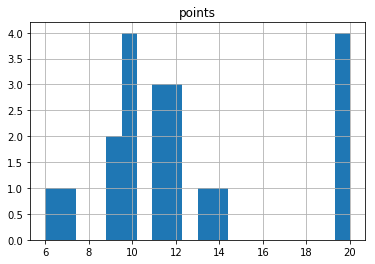

In [13]:
import matplotlib.pyplot as plt
pdf = student_df.toPandas()
print(type(pdf))
pdf.hist("points",bins=20)
plt.show()

# Manipulating Recommender Dataset with ApacheSpark

In [14]:

import sys
import pandas as pd
from pyspark.sql.types import *
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import functions as F
from pyspark.sql.window import Window

data = pd.read_csv('C:\\Users\\saikiran\\Downloads\\ml-10m\\ml-10M100K\\tags.dat', sep = "::", header=None)
data.columns = ['UserId', 'MovieId', 'Tag', 'Timestamp']
p_schema = StructType([StructField('UserId',LongType(),True),StructField('MovieId',LongType(),True),StructField('Tag',StringType(),True),StructField('Timestamp',StringType(),True)])

movie_lens = sqlContext.createDataFrame(data,p_schema)
movie_lens.show()

C:\Users\saikiran\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


+------+-------+--------------------+----------+
|UserId|MovieId|                 Tag| Timestamp|
+------+-------+--------------------+----------+
|    15|   4973|          excellent!|1215184630|
|    20|   1747|            politics|1188263867|
|    20|   1747|              satire|1188263867|
|    20|   2424|     chick flick 212|1188263835|
|    20|   2424|               hanks|1188263835|
|    20|   2424|                ryan|1188263835|
|    20|   2947|              action|1188263755|
|    20|   2947|                bond|1188263756|
|    20|   3033|               spoof|1188263880|
|    20|   3033|           star wars|1188263880|
|    20|   7438|              bloody|1188263801|
|    20|   7438|             kung fu|1188263801|
|    20|   7438|           Tarantino|1188263801|
|    21|  55247|                   R|1205081506|
|    21|  55253|               NC-17|1205081488|
|    25|     50|        Kevin Spacey|1166101426|
|    25|   6709|         Johnny Depp|1162147221|
|    31|     65|    

In [15]:
win = Window.partitionBy("UserId").orderBy(["UserId","Timestamp"])
movie_lens = movie_lens.withColumn("previous", F.lag(movie_lens.Timestamp).over(win))
movie_lens.show()

+------+-------+--------------------+----------+----------+
|UserId|MovieId|                 Tag| Timestamp|  previous|
+------+-------+--------------------+----------+----------+
|  1806|  43560|              comedy|1147983808|      null|
|  1806|  43560|                kids|1147983808|1147983808|
|  1806|   7018|            language|1172157899|1147983808|
|  1806|   7152|              nudity|1176483953|1172157899|
|  1806|   7152|                dark|1176483990|1176483953|
|  1806|  44709|        heartwarming|1176485185|1176483990|
|  1806|  44199|intelligent thriller|1176485297|1176485185|
|  1806|  43936|               tense|1176485376|1176485297|
|  1806|  43928|              stupid|1176485429|1176485376|
|  1806|  42734|              clever|1176485536|1176485429|
|  1806|  40583|       confused plot|1176485722|1176485536|
|  1806|  37475|                slow|1176485915|1176485722|
|  1806|  36527|                slow|1176485965|1176485915|
|  1806|  48043|          weak story|118

In [16]:
movie_lens = movie_lens.withColumn("difference", F.when(F.isnull(movie_lens.Timestamp - movie_lens.previous), 0)
                              .otherwise(movie_lens.Timestamp - movie_lens.previous))

movie_lens.show()

+------+-------+--------------------+----------+----------+-----------+
|UserId|MovieId|                 Tag| Timestamp|  previous| difference|
+------+-------+--------------------+----------+----------+-----------+
|  1806|  43560|              comedy|1147983808|      null|        0.0|
|  1806|  43560|                kids|1147983808|1147983808|        0.0|
|  1806|   7018|            language|1172157899|1147983808|2.4174091E7|
|  1806|   7152|              nudity|1176483953|1172157899|  4326054.0|
|  1806|   7152|                dark|1176483990|1176483953|       37.0|
|  1806|  44709|        heartwarming|1176485185|1176483990|     1195.0|
|  1806|  44199|intelligent thriller|1176485297|1176485185|      112.0|
|  1806|  43936|               tense|1176485376|1176485297|       79.0|
|  1806|  43928|              stupid|1176485429|1176485376|       53.0|
|  1806|  42734|              clever|1176485536|1176485429|      107.0|
|  1806|  40583|       confused plot|1176485722|1176485536|     

In [17]:
movie_lens = movie_lens.withColumn("Inactive",  F.when(movie_lens.difference>(30*60),1)
                           .otherwise(0))
movie_lens.show()

+------+-------+--------------------+----------+----------+-----------+--------+
|UserId|MovieId|                 Tag| Timestamp|  previous| difference|Inactive|
+------+-------+--------------------+----------+----------+-----------+--------+
|  1806|  43560|              comedy|1147983808|      null|        0.0|       0|
|  1806|  43560|                kids|1147983808|1147983808|        0.0|       0|
|  1806|   7018|            language|1172157899|1147983808|2.4174091E7|       1|
|  1806|   7152|              nudity|1176483953|1172157899|  4326054.0|       1|
|  1806|   7152|                dark|1176483990|1176483953|       37.0|       0|
|  1806|  44709|        heartwarming|1176485185|1176483990|     1195.0|       0|
|  1806|  44199|intelligent thriller|1176485297|1176485185|      112.0|       0|
|  1806|  43936|               tense|1176485376|1176485297|       79.0|       0|
|  1806|  43928|              stupid|1176485429|1176485376|       53.0|       0|
|  1806|  42734|            

In [18]:
temp_partition=Window.partitionBy(['UserId']).orderBy(movie_lens['Timestamp']) 
movie_lens = movie_lens.withColumn('TagSession',F.sum('Inactive').over(temp_partition))
movie_lens.show()

+------+-------+--------------------+----------+----------+-----------+--------+----------+
|UserId|MovieId|                 Tag| Timestamp|  previous| difference|Inactive|TagSession|
+------+-------+--------------------+----------+----------+-----------+--------+----------+
|  1806|  43560|              comedy|1147983808|      null|        0.0|       0|         0|
|  1806|  43560|                kids|1147983808|1147983808|        0.0|       0|         0|
|  1806|   7018|            language|1172157899|1147983808|2.4174091E7|       1|         1|
|  1806|   7152|              nudity|1176483953|1172157899|  4326054.0|       1|         2|
|  1806|   7152|                dark|1176483990|1176483953|       37.0|       0|         2|
|  1806|  44709|        heartwarming|1176485185|1176483990|     1195.0|       0|         2|
|  1806|  44199|intelligent thriller|1176485297|1176485185|      112.0|       0|         2|
|  1806|  43936|               tense|1176485376|1176485297|       79.0|       0|

In [22]:
#separating out the tagging sesssion of each user
movie_lens_tag = movie_lens.select("UserId","TagSession")
#counting the tag session foe each user
#movie_lens_tag = movie_lens_tag.groupBy("UserId","TagSession").count()
movie_lens_tag.show()

+------+----------+
|UserId|TagSession|
+------+----------+
|  1806|         0|
|  1806|         0|
|  1806|         1|
|  1806|         2|
|  1806|         2|
|  1806|         2|
|  1806|         2|
|  1806|         2|
|  1806|         2|
|  1806|         2|
|  1806|         2|
|  1806|         2|
|  1806|         2|
|  1806|         3|
|  1806|         3|
|  1806|         3|
|  1806|         4|
|  1806|         5|
|  2040|         0|
|  2040|         0|
+------+----------+
only showing top 20 rows



In [23]:
#calculate the frequency of tagging for each user session
movie_lens_tag = movie_lens_tag.groupby("UserId","TagSession").count()
movie_lens_tag.show()

+------+----------+-----+
|UserId|TagSession|count|
+------+----------+-----+
|  1806|         0|    2|
|  1806|         1|    1|
|  1806|         2|   10|
|  1806|         3|    3|
|  1806|         4|    1|
|  1806|         5|    1|
|  2040|         0|    2|
| 15437|         0|    1|
| 15663|         0|    1|
| 15846|         0|    9|
| 18295|         0|    1|
| 18295|         1|    3|
| 18730|         0|    1|
| 19141|         0|    1|
| 25649|         0|    1|
| 25649|         1|    1|
| 25649|         2|    1|
| 25649|         3|    1|
| 27919|         0|    1|
| 27919|         1|    2|
+------+----------+-----+
only showing top 20 rows



In [24]:
#Find a mean of the tagging frequency of each user.
movie_lens_tag_each_mean = movie_lens_tag.groupBy('UserID').agg(F.avg('count').alias('mean_each_user'))
movie_lens_tag = movie_lens_tag.join(movie_lens_tag_each_mean, on=['UserID'], how='left_outer')
movie_lens_tag.show()

+------+----------+-----+--------------+
|UserId|TagSession|count|mean_each_user|
+------+----------+-----+--------------+
|  1806|         0|    2|           3.0|
|  1806|         1|    1|           3.0|
|  1806|         2|   10|           3.0|
|  1806|         3|    3|           3.0|
|  1806|         4|    1|           3.0|
|  1806|         5|    1|           3.0|
|  2040|         0|    2|           2.0|
| 15437|         0|    1|           1.0|
| 15663|         0|    1|           1.0|
| 15846|         0|    9|           9.0|
| 18295|         0|    1|           2.0|
| 18295|         1|    3|           2.0|
| 18730|         0|    1|           1.0|
| 19141|         0|    1|           1.0|
| 25649|         0|    1|           1.0|
| 25649|         1|    1|           1.0|
| 25649|         2|    1|           1.0|
| 25649|         3|    1|           1.0|
| 27919|         0|    1|           1.5|
| 27919|         1|    2|           1.5|
+------+----------+-----+--------------+
only showing top

In [25]:
#Find a standard deviation of the tagging frequency of each user.
movie_lens_tag_each_std = movie_lens_tag.groupBy('UserID').agg(F.stddev('count').alias('std_each_user'))
movie_lens_tag = movie_lens_tag.join(movie_lens_tag_each_std, on=['UserID'], how='left_outer')
movie_lens_tag = movie_lens_tag.fillna({'std_each_user':0.0})
movie_lens_tag.show()

+------+----------+-----+--------------+------------------+
|UserId|TagSession|count|mean_each_user|     std_each_user|
+------+----------+-----+--------------+------------------+
|  1806|         0|    2|           3.0| 3.521363372331802|
|  1806|         1|    1|           3.0| 3.521363372331802|
|  1806|         2|   10|           3.0| 3.521363372331802|
|  1806|         3|    3|           3.0| 3.521363372331802|
|  1806|         4|    1|           3.0| 3.521363372331802|
|  1806|         5|    1|           3.0| 3.521363372331802|
|  2040|         0|    2|           2.0|               0.0|
| 15437|         0|    1|           1.0|               0.0|
| 15663|         0|    1|           1.0|               0.0|
| 15846|         0|    9|           9.0|               0.0|
| 18295|         0|    1|           2.0|1.4142135623730951|
| 18295|         1|    3|           2.0|1.4142135623730951|
| 18730|         0|    1|           1.0|               0.0|
| 19141|         0|    1|           1.0|

In [26]:
#Find a mean and standard deviation of the tagging frequency for across users.
from pyspark.sql.functions import mean as _mean, stddev as _stddev, col,when

df_stats2 = movie_lens_tag.select(
    _mean(col('count')).alias('mean'),
    _stddev(col('count')).alias('std')).collect()

mean = df_stats2[0]['mean']
std = df_stats2[0]['std']
print("total mean across all users:",mean)
print("total std across all users:",std)


('total mean across all users:', 7.300084014358817)
('total std across all users:', 22.26429305026497)


In [27]:
movie_lens_tag.filter(movie_lens_tag['mean_each_user']>(2*std +mean )).show()

+------+----------+-----+------------------+------------------+
|UserId|TagSession|count|    mean_each_user|     std_each_user|
+------+----------+-----+------------------+------------------+
|  2030|         0|   72|              72.0|               0.0|
| 20729|         0|  110|            52.875| 83.38797018412531|
| 20729|         1|  238|            52.875| 83.38797018412531|
| 20729|         2|   45|            52.875| 83.38797018412531|
| 20729|         3|   10|            52.875| 83.38797018412531|
| 20729|         4|    1|            52.875| 83.38797018412531|
| 20729|         5|    7|            52.875| 83.38797018412531|
| 20729|         6|   11|            52.875| 83.38797018412531|
| 20729|         7|    1|            52.875| 83.38797018412531|
| 44049|         0|   57|              57.0|               0.0|
| 61519|         0|   55|             128.0|103.23759005323593|
| 61519|         1|  201|             128.0|103.23759005323593|
| 57022|         0|   82|              8

# Analysis of Movielens dataset using Apache Spark MapReduce

In [1]:
import sys
import pandas as pd
from pyspark.sql.types import *
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import functions as F
from pyspark.sql.window import Window

movie_data = pd.read_csv('C:\\Users\\saikiran\\Downloads\\ml-10m\\ml-10M100K\\movies.dat', sep = "::", header=None,parse_dates=False,nrows=100000)
movie_data.columns = ['MovieId', 'Title', 'Genres']
p_schema = StructType([StructField('MovieId',StringType(),True),StructField('Title',StringType(),True),StructField('Genres',StringType(),True)])

movie_lens_mdata = sqlContext.createDataFrame(movie_data,p_schema)
movie_lens_mdata.show()

C:\Users\saikiran\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


+-------+--------------------+--------------------+
|MovieId|               Title|              Genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|  Adventure|Children|
|      9| Sudden Death (1995)|              Action|
|     10|    GoldenEye (1995)|Action|Adventure|...|
|     11|American Presiden...|Comedy|Drama|Romance|
|     12|Dracula: Dead and...|       Comedy|Horror|
|     13|        Balto (1995)|  Animation|Children|
|     14|        Nixon (1995)|               Drama|
|     15|Cutthroat Island ...|Action|Adventure|...|
|     16|       Casino (1995)|         Crime|Drama|
|     17|Sen

In [2]:
rating_data = pd.read_csv('C:\\Users\\saikiran\\Downloads\\ml-10m\\ml-10M100K\\ratings.dat', sep = "::", header=None,nrows=100000)
rating_data = rating_data.iloc[:,0:3]
rating_data.columns = ['UserId','MovieId','Ratings']
q_schema = StructType([StructField('UserId',StringType(),True),StructField('MovieId',StringType(),True),StructField('Ratings',DoubleType(),True)])

movie_lens_rdata = sqlContext.createDataFrame(rating_data,q_schema)
movie_lens_rdata.show()

C:\Users\saikiran\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


+------+-------+-------+
|UserId|MovieId|Ratings|
+------+-------+-------+
|     1|    122|    5.0|
|     1|    185|    5.0|
|     1|    231|    5.0|
|     1|    292|    5.0|
|     1|    316|    5.0|
|     1|    329|    5.0|
|     1|    355|    5.0|
|     1|    356|    5.0|
|     1|    362|    5.0|
|     1|    364|    5.0|
|     1|    370|    5.0|
|     1|    377|    5.0|
|     1|    420|    5.0|
|     1|    466|    5.0|
|     1|    480|    5.0|
|     1|    520|    5.0|
|     1|    539|    5.0|
|     1|    586|    5.0|
|     1|    588|    5.0|
|     1|    589|    5.0|
+------+-------+-------+
only showing top 20 rows



In [3]:
#joining movies and ratings dataframes to single dataframe

movie_rating_data = movie_lens_mdata.join(movie_lens_rdata, on=['MovieId'], how='left_outer')
fill_values = {column: movie_rating_data.agg({column:"mean"}).first()[0] for column in movie_rating_data.columns if column  in ['Ratings']}
movie_rating_data = movie_rating_data.na.fill(fill_values)
movie_rating_data = movie_rating_data.fillna({'MovieId':"Unknown"})
movie_rating_data = movie_rating_data.fillna({'Title':"Unknown"})
movie_rating_data = movie_rating_data.fillna({'Genres':"Unknown"})
movie_rating_data = movie_rating_data.fillna({'UserId':"Unknown"})
movie_rating_data.show()

+-------+--------------+---------+------+-------+
|MovieId|         Title|   Genres|UserId|Ratings|
+-------+--------------+---------+------+-------+
|   1090|Platoon (1986)|Drama|War|    18|    4.0|
|   1090|Platoon (1986)|Drama|War|    34|    4.0|
|   1090|Platoon (1986)|Drama|War|    51|    4.0|
|   1090|Platoon (1986)|Drama|War|    73|    4.0|
|   1090|Platoon (1986)|Drama|War|    78|    4.0|
|   1090|Platoon (1986)|Drama|War|    81|    4.0|
|   1090|Platoon (1986)|Drama|War|    96|    3.0|
|   1090|Platoon (1986)|Drama|War|   104|    5.0|
|   1090|Platoon (1986)|Drama|War|   107|    3.0|
|   1090|Platoon (1986)|Drama|War|   112|    3.0|
|   1090|Platoon (1986)|Drama|War|   122|    4.0|
|   1090|Platoon (1986)|Drama|War|   123|    5.0|
|   1090|Platoon (1986)|Drama|War|   126|    2.5|
|   1090|Platoon (1986)|Drama|War|   135|    4.0|
|   1090|Platoon (1986)|Drama|War|   137|    3.0|
|   1090|Platoon (1986)|Drama|War|   138|    4.0|
|   1090|Platoon (1986)|Drama|War|   139|    5.0|


In [4]:
#Find the movie title which has the maximum average ratings
from pyspark.sql.functions import mean, desc
#using Map Reduce
movie_rating_rdd = movie_rating_data.rdd #convert datafram to rdd
average_mean_data = movie_rating_rdd.map(lambda x: (x[1], x[4])) # selects title and ratings
average_mean_data = average_mean_data.mapValues(lambda x: (x, 1))#generate count
average_mean_data = average_mean_data.reduceByKey(lambda x, y: (x[0]+y[0], x[1]+y[1]))#generate sum and count
average_mean_data = average_mean_data.mapValues(lambda x: x[0]/x[1]) # calculate the average ratings
#average_mean_data = average_mean_data.sortBy(lambda x: x[1], ascending = False)  # sort in descending
schema = StructType([StructField('Title',StringType(),True),StructField('Ratings',DoubleType(),True)])
average_mean_df = sqlContext.createDataFrame(average_mean_data, schema) #RDD to dataframe
average_mean_df = average_mean_df.orderBy(desc("Ratings")) 
average_mean_df.show(10)


+--------------------+-------+
|               Title|Ratings|
+--------------------+-------+
|Eight Days a Week...|    5.0|
|Trouble with Ange...|    5.0|
|Marathon Family, ...|    5.0|
|    Soul Food (1997)|    5.0|
|Seven Chances (1925)|    5.0|
| New Age, The (1994)|    5.0|
|After Dark, My Sw...|    5.0|
|       Gabbeh (1996)|    5.0|
|Queen Christina (...|    5.0|
|Place in the Sun,...|    5.0|
+--------------------+-------+
only showing top 10 rows



In [5]:
#Find the movie genre with the highest average ratings?
#using Map Reduce
genre_rating_rdd = movie_rating_data.rdd #convert datafram to rdd
average_genre_data = genre_rating_rdd.map(lambda x: (x[2], x[4])) # selects title and ratings
average_genre_data = average_genre_data.mapValues(lambda x: (x, 1))#generate count
average_genre_data = average_genre_data.reduceByKey(lambda x, y: (x[0]+y[0], x[1]+y[1]))#generate sum and count
average_genre_data = average_genre_data.mapValues(lambda x: x[0]/x[1]) # calculate the average ratings
#average_mean_data = average_mean_data.sortBy(lambda x: x[1], ascending = False)  # sort in descending
schema = StructType([StructField('Genre',StringType(),True),StructField('Ratings',DoubleType(),True)])
average_genre_df = sqlContext.createDataFrame(average_genre_data, schema)#RDD to dataframe
average_genre_df = average_genre_df.orderBy(desc("Ratings")) 
average_genre_df.show(10)

+--------------------+-----------------+
|               Genre|          Ratings|
+--------------------+-----------------+
|Adventure|Romance...|              5.0|
| Documentary|Fantasy|              5.0|
|Drama|Mystery|Rom...|             4.75|
|Comedy|Drama|Film...|4.666666666666667|
|Drama|Film-Noir|H...|              4.5|
|Adventure|Drama|F...|              4.5|
|Action|Drama|Fant...|              4.5|
|Adventure|Drama|S...|              4.5|
|Horror|Musical|My...|              4.5|
|Children|Comedy|C...|              4.5|
+--------------------+-----------------+
only showing top 10 rows



In [6]:
#2.	Find the user who has assign the lowest average ratings among all the users the number of ratings greater than 40?

movie_rating_data_tmp = movie_rating_data.groupby(movie_rating_data.UserId, movie_rating_data.Ratings).count()
movie_rating_data_tmp = movie_rating_data_tmp.filter(movie_rating_data_tmp['count']>40 )



user_rating_rdd = movie_rating_data_tmp.rdd #convert datafram to rdd
average_user_data = user_rating_rdd.map(lambda x: (x[0], x[1])) # selects title and ratings
average_user_data = average_user_data.mapValues(lambda x: (x, 1))#generate count
average_user_data = average_user_data.reduceByKey(lambda x, y: (x[0]+y[0], x[1]+y[1]))#generate sum and count
#average_user_data = average_user_data.filter(lambda x: len(x[0])>40)

average_user_data = average_user_data.mapValues(lambda x: x[0]/x[1]) # calculate the average ratings
average_user_data = average_user_data.sortBy(lambda x: x[1], ascending = True)
schema = StructType([StructField('UserId',StringType(),True),StructField('Ratings',DoubleType(),True)])
average_user_df = sqlContext.createDataFrame(average_user_data, schema)#RDD to dataframe
#average_user_df = average_user_df.orderBy(desc("Ratings")) 
average_user_df.show(10)
#print(average_user_data.take(10))

+------+-------+
|UserId|Ratings|
+------+-------+
|   672|    2.0|
|   739|    2.0|
|   556|    2.0|
|   160|    2.0|
|   276|   2.25|
|    34|    2.5|
|   759|    2.5|
|   426|    2.5|
|   307|    2.5|
|   480|    2.5|
+------+-------+
only showing top 10 rows

